In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data=pd.read_csv("Placement_Data_Full_Class.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Drop sl_no col

In [5]:
data.drop("sl_no", axis=1, inplace=True)

In [6]:
data.rename(columns={"specialisation":"mba_s"}, inplace=True)

In [7]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_s,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    object 
 3   hsc_p     215 non-null    float64
 4   hsc_b     215 non-null    object 
 5   hsc_s     215 non-null    object 
 6   degree_p  215 non-null    float64
 7   degree_t  215 non-null    object 
 8   workex    215 non-null    object 
 9   etest_p   215 non-null    float64
 10  mba_s     215 non-null    object 
 11  mba_p     215 non-null    float64
 12  status    215 non-null    object 
 13  salary    148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [9]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [10]:
data.isnull().sum()

gender       0
ssc_p        0
ssc_b        0
hsc_p        0
hsc_b        0
hsc_s        0
degree_p     0
degree_t     0
workex       0
etest_p      0
mba_s        0
mba_p        0
status       0
salary      67
dtype: int64

We don't need salary info as we only require info on their placement status. So we'll drop salary column

In [11]:
data.drop("salary", axis=1, inplace=True)

Convert status column values to int: Placed -> 1 and Not Placed -> 0

In [12]:
data['status'] = data['status'].map({'Placed': 1, "Not Placed": 0})

In [13]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_s,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


### Convert features of string data type into int or float

In [14]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(data[label]):
        lst = data[label].unique()
        label_map = {}
        for i in range(len(lst)):
            label_map[lst[i]] = i
        data[label] = data[label].map(label_map)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    int64  
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    int64  
 3   hsc_p     215 non-null    float64
 4   hsc_b     215 non-null    int64  
 5   hsc_s     215 non-null    int64  
 6   degree_p  215 non-null    float64
 7   degree_t  215 non-null    int64  
 8   workex    215 non-null    int64  
 9   etest_p   215 non-null    float64
 10  mba_s     215 non-null    int64  
 11  mba_p     215 non-null    float64
 12  status    215 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 22.0 KB


In [15]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_s,mba_p,status
0,0,67.00,0,91.00,0,0,58.00,0,0,55.0,0,58.80,1
1,0,79.33,1,78.33,0,1,77.48,0,1,86.5,1,66.28,1
2,0,65.00,1,68.00,1,2,64.00,1,0,75.0,1,57.80,1
3,0,56.00,1,52.00,1,1,52.00,0,0,66.0,0,59.43,0
4,0,85.80,1,73.60,1,0,73.30,1,0,96.8,1,55.50,1


In [16]:
data["ssc_b"].unique(), data["hsc_b"].unique(), data["hsc_s"].unique(), data["degree_t"].unique(), data["mba_s"].unique()

(array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1, 2], dtype=int64),
 array([0, 1, 2], dtype=int64),
 array([0, 1], dtype=int64))

### Plot correlation matrix

<AxesSubplot:>

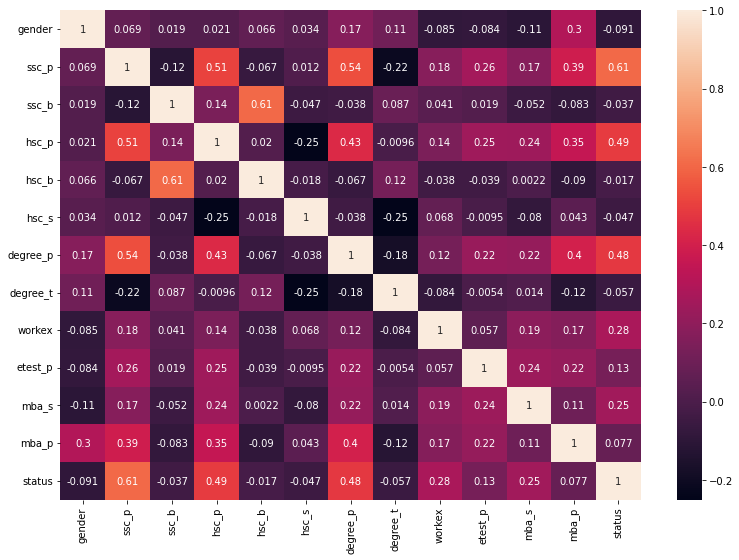

In [17]:
plt.figure(figsize=(13,9))
sns.heatmap(data.corr(), annot=True)

No variables are too highly with each other.

In [18]:
x = data.drop("status",axis=1)
y = data['status']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

In [35]:
from sklearn.tree import DecisionTreeClassifier
a= DecisionTreeClassifier() 
a.fit(x_train,y_train)
w = a.predict(x_test) 

In [38]:
from sklearn.metrics import classification_report
m = classification_report(y_test, w) 
print(m)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.90      0.92      0.91        48

    accuracy                           0.86        65
   macro avg       0.82      0.81      0.82        65
weighted avg       0.86      0.86      0.86        65



In [20]:
from sklearn.ensemble import RandomForestClassifier
b = RandomForestClassifier() 
b.fit(x_train,y_train)
q = b.predict(x_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
m = classification_report(y_test, q) 
print(m)

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        19
           1       0.86      0.96      0.91        46

    accuracy                           0.86        65
   macro avg       0.86      0.79      0.82        65
weighted avg       0.86      0.86      0.85        65



In [43]:
from sklearn.naive_bayes import GaussianNB
c = GaussianNB() 
c.fit(x_train,y_train)
r = c.predict(x_test)


In [44]:
from sklearn.metrics import classification_report
m = classification_report(y_test, r) 
print(m)

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.91      0.88      0.89        48

    accuracy                           0.85        65
   macro avg       0.80      0.82      0.81        65
weighted avg       0.85      0.85      0.85        65



In [45]:
from sklearn.neighbors import KNeighborsClassifier
d = KNeighborsClassifier()
d.fit(x_train,y_train)
p = d.predict(x_test)


In [46]:
from sklearn.metrics import classification_report
m = classification_report(y_test, p) 
print(m)

              precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.86      0.90      0.88        48

    accuracy                           0.82        65
   macro avg       0.76      0.74      0.75        65
weighted avg       0.81      0.82      0.81        65



In [47]:
from sklearn.svm import SVC
e = SVC()
e.fit(x_train,y_train)
o = e.predict(x_test)



In [49]:
from sklearn.metrics import classification_report
m = classification_report(y_test, o) 
print(m)

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        17
           1       0.87      0.94      0.90        48

    accuracy                           0.85        65
   macro avg       0.82      0.76      0.78        65
weighted avg       0.84      0.85      0.84        65



In [52]:
from sklearn.linear_model import LogisticRegression
f = LogisticRegression()
f.fit(x_train,y_train)
j = f.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [53]:
from sklearn.metrics import classification_report
m = classification_report(y_test, j) 
print(m)

              precision    recall  f1-score   support

           0       0.90      0.53      0.67        17
           1       0.85      0.98      0.91        48

    accuracy                           0.86        65
   macro avg       0.88      0.75      0.79        65
weighted avg       0.87      0.86      0.85        65



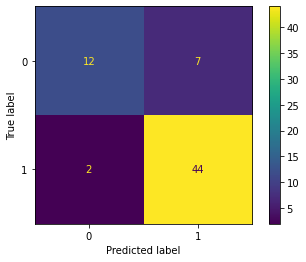

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, q, labels=b.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=b.classes_)
disp.plot()
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(b, x, y, cv=5, scoring=None)

array([0.90697674, 0.81395349, 0.90697674, 0.8372093 , 0.79069767])